In [ ]:
!pip install dtreeviz
!apt-get install graphviz

Reading package lists... Done
Building dependency tree       
Reading state information... Done
graphviz is already the newest version (2.40.1-2).
0 upgraded, 0 newly installed, 0 to remove and 14 not upgraded.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Pre Processing

## Data pre processing untuk variabel target

### Data Suicide Ringkas

In [ ]:
import requests
import json
import pandas as pd
r = requests.get('http://apps.who.int/gho/athena/api/GHO/MH_12/.json?filter=Year:2016')
suicides = r.json()

In [ ]:
list_of_data = []
for fact in suicides['fact']:
    for category in fact['Dim']:
        if category['category'] == 'COUNTRY':
            country_code = category['code']
        elif category['category'] == "SEX":
            sex = category['code']
    suicide_rate = fact['value']['numeric']
    list_of_data.append({'Country Code': country_code, 'Sex': sex, "Suicide Rate": suicide_rate})

country_codes = []
for country in list_of_data:
    country_codes.append(country['Country Code'])

country_codes = set(country_codes)

data_dictionary = []
for country in country_codes:
    data_dictionary.append({'Country Code': country, 'Male Suicide Rate':'', 'Female Suicide Rate':'', 'Combined Suicide Rate':''})

In [ ]:
for data in list_of_data:
    for country in data_dictionary:
        if data['Country Code'] == country['Country Code']:
            if data['Sex'] == 'MLE':
                country['Male Suicide Rate'] = data['Suicide Rate']
            elif data['Sex'] == "FMLE":
                country['Female Suicide Rate'] = data['Suicide Rate']
            elif data['Sex'] == 'BTSX':
                country['Combined Suicide Rate'] = data['Suicide Rate']

In [ ]:
suicide_rates = pd.DataFrame.from_dict(data_dictionary,)
suicide_rates.set_index(['Country Code'], inplace=True)
suicide_rates.sort_index(inplace=True)

In [ ]:
suicide_rates.head()

,Male Suicide Rate,Female Suicide Rate,Combined Suicide Rate
Country Code,,,
AFG,10.6,2.1,6.4
AGO,14.0,4.6,8.9
ALB,7.0,4.3,5.6
ARE,3.5,0.8,2.7
ARG,15.0,3.5,9.1


In [ ]:
r = requests.get('http://apps.who.int/gho/athena/api/GHO/MH_12/.json?filter=Year:2016')
data = r.json()
country_names = []
for country in data['dimension'][4]['code']:
    country_names.append({'Country Code': country['label'], 'Country Name': country['display']})

country_names_df = pd.DataFrame.from_dict(country_names)
country_names_df.set_index('Country Code', inplace=True)

country_names_df.loc[country_names_df.index == "MLT"]

# clean Up Country Names
country_names_df.loc[country_names_df['Country Name'] == "Democratic People's Republic of Korea"] = "North Korea"
country_names_df.loc[country_names_df['Country Name'] == "The former Yugoslav republic of Macedonia"] = "Macedonia"
country_names_df.loc[country_names_df['Country Name'] == "Republic of Moldova"] = "Moldova"
country_names_df.loc[country_names_df['Country Name'] == "Iran (Islamic Republic of)"] = "Iran"
country_names_df.loc[country_names_df['Country Name'] == "Russian Federation"] = "Russia"
country_names_df.loc[country_names_df['Country Name'] == "United Kingdom of Great Britain and Northern Ireland"] = "United Kingdom"
country_names_df.loc[country_names_df['Country Name'] == "Venezuela (Bolivarian Republic of)"] = "Venezuela"
country_names_df.loc[country_names_df['Country Name'] == "United States of America"] = "United States"

country_names_df.tail(15)

suicide_rates = suicide_rates.join(country_names_df)
# suicide_rates

In [ ]:
suicide_rates = suicide_rates[['Country Name', 'Combined Suicide Rate', 'Male Suicide Rate', 'Female Suicide Rate']]
suicide_rates.head()

,Country Name,Combined Suicide Rate,Male Suicide Rate,Female Suicide Rate
Country Code,,,,
AFG,Afghanistan,6.4,10.6,2.1
AGO,Angola,8.9,14.0,4.6
ALB,Albania,5.6,7.0,4.3
ARE,United Arab Emirates,2.7,3.5,0.8
ARG,Argentina,9.1,15.0,3.5


In [ ]:
suicide_rates.shape

(183, 4)

In [ ]:
suicide_rates.set_index(['Country Name'], inplace=True)
suicide_rates.head()

,Combined Suicide Rate,Male Suicide Rate,Female Suicide Rate
Country Name,,,
Afghanistan,6.4,10.6,2.1
Angola,8.9,14.0,4.6
Albania,5.6,7.0,4.3
United Arab Emirates,2.7,3.5,0.8
Argentina,9.1,15.0,3.5


In [ ]:
suicide_rates=suicide_rates.rename(columns={'Combined Suicide Rate':'gabungan', 'Male Suicide Rate':'pria', 'Female Suicide Rate':'wanita'})

### Data Suicide Lengkap

In [ ]:
# Load data
suicide=pd.read_csv("/content/master.csv")

In [ ]:
# melihat 5 baris teratas dari data
suicide.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [ ]:
suicide.describe()

,year,suicides_no,population,suicides/100k pop,HDI for year,gdp_per_capita ($)
count,27820.000000,27820.000000,2.782000e+04,27820.000000,8364.000000,27820.000000
mean,2001.258375,242.574407,1.844794e+06,12.816097,0.776601,16866.464414
std,8.469055,902.047917,3.911779e+06,18.961511,0.093367,18887.576472
min,1985.000000,0.000000,2.780000e+02,0.000000,0.483000,251.000000
25%,1995.000000,3.000000,9.749850e+04,0.920000,0.713000,3447.000000
50%,2002.000000,25.000000,4.301500e+05,5.990000,0.779000,9372.000000
75%,2008.000000,131.000000,1.486143e+06,16.620000,0.855000,24874.000000
max,2016.000000,22338.000000,4.380521e+07,224.970000,0.944000,126352.000000


In [ ]:
# melihat tipe data dan jumlah baris yang tidak kosong
suicide.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             27820 non-null  object 
 1   year                27820 non-null  int64  
 2   sex                 27820 non-null  object 
 3   age                 27820 non-null  object 
 4   suicides_no         27820 non-null  int64  
 5   population          27820 non-null  int64  
 6   suicides/100k pop   27820 non-null  float64
 7   country-year        27820 non-null  object 
 8   HDI for year        8364 non-null   float64
 9    gdp_for_year ($)   27820 non-null  object 
 10  gdp_per_capita ($)  27820 non-null  int64  
 11  generation          27820 non-null  object 
dtypes: float64(2), int64(4), object(6)
memory usage: 2.5+ MB


In [ ]:
# melihat kolom data
suicide.columns

Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicides/100k pop', 'country-year', 'HDI for year',
       ' gdp_for_year ($) ', 'gdp_per_capita ($)', 'generation'],
      dtype='object')

In [ ]:
suicide=suicide.rename(columns={'suicides/100k pop':'suicide_rate','country-year':'country_year', 'HDI for year':'HDI',' gdp_for_year ($) ':'GDP_year', 'gdp_per_capita ($)':'GDP_capita'})

In [ ]:
suicide.shape

(27820, 12)

In [ ]:
suicide.isnull().sum()

country             0
year                0
sex                 0
age                 0
suicides_no         0
population          0
suicide_rate        0
country_year        0
HDI             19456
GDP_year            0
GDP_capita          0
generation          0
dtype: int64

In [ ]:
# menghapus kolom HDI karena terlalu banyak missing value
# menghapus kolom country year karena sama kolom year
suicide=suicide.drop(['HDI','country_year'],axis=1)

In [ ]:
# set kolom country menjadi index
suicide.set_index(['country'], inplace=True)

In [ ]:
suicide.head()

,year,sex,age,suicides_no,population,suicide_rate,GDP_year,GDP_capita,generation
country,,,,,,,,,
Albania,1987,male,15-24 years,21,312900,6.71,"2,156,624,900",796,Generation X
Albania,1987,male,35-54 years,16,308000,5.19,"2,156,624,900",796,Silent
Albania,1987,female,15-24 years,14,289700,4.83,"2,156,624,900",796,Generation X
Albania,1987,male,75+ years,1,21800,4.59,"2,156,624,900",796,G.I. Generation
Albania,1987,male,25-34 years,9,274300,3.28,"2,156,624,900",796,Boomers


In [ ]:
suicide16=suicide.loc[suicide['year']==2016]
suicide16.head()

,year,sex,age,suicides_no,population,suicide_rate,GDP_year,GDP_capita,generation
country,,,,,,,,,
Armenia,2016,male,75+ years,12,61956,19.37,"10,546,135,160",3788,Silent
Armenia,2016,male,55-74 years,16,237813,6.73,"10,546,135,160",3788,Boomers
Armenia,2016,male,35-54 years,16,350633,4.56,"10,546,135,160",3788,Generation X
Armenia,2016,male,15-24 years,5,202220,2.47,"10,546,135,160",3788,Millenials
Armenia,2016,female,75+ years,2,102414,1.95,"10,546,135,160",3788,Silent


In [ ]:
suicide16.shape

(160, 9)

In [ ]:
#jumlahSuicide2016=suicide16.groupby(['country']).suicides_no.sum()
#isinstance(jumlahSuicide2016, pd.DataFrame)

In [ ]:
#jumlahSuicide2016.shape

## Data pre processing untuk variabel prediktor 

In [ ]:
cerai=pd.read_csv('/content/divorces-per-1000-people.csv')
hdi=pd.read_csv('/content/hdi_human_development_index.csv', error_bad_lines=False)
gini=pd.read_csv('/content/inequality_index_gini.csv')
internet=pd.read_csv('/content/internet_users.csv')
nganggur=pd.read_csv('/content/long_term_unemployment_rate_percent.csv')
trust=pd.read_csv('/content/self-reported-trust-attitudes.csv')
skizof=pd.read_csv('/content/share-of-population-with-schizophrenia.csv')
drug=pd.read_csv('/content/share-with-alcohol-or-drug-use-disorders.csv')
cemas=pd.read_csv('/content/share-with-anxiety-disorders.csv')
bipolar=pd.read_csv('/content/share-with-bipolar-disorder.csv')
depresi=pd.read_csv('/content/share-with-depression.csv')
alkohol=pd.read_csv('/content/total-alcohol-consumption-per-capita-litres-of-pure-alcohol.csv')
agama=pd.read_csv('/content/Importance of Religion by Country.csv', sep=";")


b'Skipping line 40: expected 30 fields, saw 31\nSkipping line 41: expected 30 fields, saw 31\nSkipping line 112: expected 30 fields, saw 31\n'


In [ ]:
gdp=pd.read_csv('/content/gdppercapita_us_inflation_adjusted.csv')

### Cerai

In [ ]:
cerai.tail()

,Entity,Code,Year,"Crude divorce rate (per 1,000 inhabitants)"
2814,Venezuela,VEN,2006,0.9
2815,Vietnam,VNM,2002,0.5
2816,Western Sahara,ESH,1970,2.1
2817,Yemen,YEM,2001,0.0
2818,Yemen,YEM,2003,0.0


terlihat bahwa data paling recent adalah tahun 2016

In [ ]:
cerai.info

<bound method DataFrame.info of               Entity Code  Year  Crude divorce rate (per 1,000 inhabitants)
0            Albania  ALB  1960                                         0.5
1            Albania  ALB  1961                                         0.8
2            Albania  ALB  1962                                         0.7
3            Albania  ALB  1963                                         0.6
4            Albania  ALB  1964                                         0.6
...              ...  ...   ...                                         ...
2814       Venezuela  VEN  2006                                         0.9
2815         Vietnam  VNM  2002                                         0.5
2816  Western Sahara  ESH  1970                                         2.1
2817           Yemen  YEM  2001                                         0.0
2818           Yemen  YEM  2003                                         0.0

[2819 rows x 4 columns]>

In [ ]:
cerai.dtypes

Entity                                         object
Code                                           object
Year                                            int64
Crude divorce rate (per 1,000 inhabitants)    float64
dtype: object

In [ ]:
# mengambil tahun 2016
cerai16=cerai.loc[cerai['Year']==2016]
cerai16=cerai16.drop('Year', axis=1)
cerai16.head()

,Entity,Code,"Crude divorce rate (per 1,000 inhabitants)"
51,Albania,ALB,1.9
79,Armenia,ARM,1.2
122,Australia,AUS,1.9
180,Austria,AUT,1.8
197,Azerbaijan,AZE,1.3


In [ ]:
cerai16.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48 entries, 51 to 2794
Data columns (total 3 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Entity                                      48 non-null     object 
 1   Code                                        48 non-null     object 
 2   Crude divorce rate (per 1,000 inhabitants)  48 non-null     float64
dtypes: float64(1), object(2)
memory usage: 1.5+ KB


In [ ]:
# mengganti nama kolom 2016 pada data cerai
cerai=cerai.rename(columns={'Entity':'country','Year':'year','Crude divorce rate (per 1,000 inhabitants)':'cerai'})
cerai16=cerai16.rename(columns={'Entity':'country','Crude divorce rate (per 1,000 inhabitants)':'cerai'})
print("Nama kolom pada data cerai:", cerai.columns)
print("Nama kolom pada data cerai tahun 2016:", cerai16.columns)

Nama kolom pada data cerai: Index(['country', 'Code', 'year', 'cerai'], dtype='object')
Nama kolom pada data cerai tahun 2016: Index(['country', 'Code', 'cerai'], dtype='object')


In [ ]:
# set kolom country menjadi index
cerai16.set_index(['country'], inplace=True)
cerai16.head()

,Code,cerai
country,,
Albania,ALB,1.9
Armenia,ARM,1.2
Australia,AUS,1.9
Austria,AUT,1.8
Azerbaijan,AZE,1.3


### Human Development Index (HDI)

In [ ]:
hdi.head()

,country,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Afghanistan,0.298,0.304,0.312,0.308,0.303,0.327,0.331,0.335,0.339,0.343,0.345,0.347,0.378,0.387,0.400,0.410,0.419,0.431,0.436,0.447,0.464,0.465,0.479,0.485,0.488,0.490,0.491,0.493,0.496
1,Albania,0.644,0.625,0.608,0.611,0.617,0.629,0.639,0.639,0.649,0.660,0.667,0.673,0.680,0.687,0.692,0.702,0.709,0.718,0.724,0.729,0.740,0.759,0.771,0.781,0.787,0.788,0.788,0.789,0.791
2,Algeria,0.578,0.582,0.589,0.593,0.597,0.602,0.610,0.619,0.629,0.638,0.646,0.655,0.666,0.676,0.685,0.694,0.699,0.708,0.711,0.720,0.730,0.738,0.737,0.746,0.749,0.751,0.755,0.758,0.759
3,Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.759,0.767,0.780,0.820,0.826,0.819,0.829,0.829,0.831,0.830,0.828,0.827,0.849,0.846,0.853,0.850,0.854,0.852,0.857
4,Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.384,0.394,0.404,0.419,0.428,0.440,0.453,0.466,0.482,0.494,0.508,0.510,0.525,0.537,0.547,0.557,0.565,0.570,0.576,0.574


In [ ]:
# mengambil data 2016 saja
hdi16=hdi[['country', '2016']]
hdi16.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   country  185 non-null    object 
 1   2016     184 non-null    float64
dtypes: float64(1), object(1)
memory usage: 3.0+ KB


In [ ]:
# mengganti nama kolom 2016 pada data HDI
hdi=hdi.rename(columns={'2016':'HDI'})
hdi16=hdi16.rename(columns={'2016':'HDI'})
print("Nama kolom pada data HDI:", hdi.columns)
print("Nama kolom pada data HDI tahun 2016:", hdi16.columns)

Nama kolom pada data HDI: Index(['country', '1990', '1991', '1992', '1993', '1994', '1995', '1996',
       '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005',
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
       '2015', 'HDI', '2017', '2018'],
      dtype='object')
Nama kolom pada data HDI tahun 2016: Index(['country', 'HDI'], dtype='object')


In [ ]:
# set kolom country menjadi index
hdi16.set_index(['country'], inplace=True)
hdi16.head()

,HDI
country,
Afghanistan,0.491
Albania,0.788
Algeria,0.755
Andorra,0.854
Angola,0.570


### Gross Domestic Product (GDP)

In [ ]:
gdp.head()

,country,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,330.0,343.0,333.0,357.0,365.0,406.0,412.0,488.0,543,529.0,576.0,588.0,584.0,574.0,571.0,572.0,568.0,571.0
1,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1990.0,2060.0,2080.0,2060.0,1990.0,1990.0,2060.0,2000.0,1940.0,2070.0,1840.0,1330.0,1240.0,1370.0,1490.0,1700.0,1870.0,1680.0,1840.0,2090.0,2240.0,2450.0,2570.0,2730.0,2890.0,3060.0,3260.0,3490.0,3780.0,3930.0,4090,4210.0,4280.0,4330.0,4410.0,4520.0,4680.0,4860.0,5070.0,5210.0
2,Algeria,2480.0,2090.0,1640.0,2150.0,2210.0,2290.0,2120.0,2260.0,2430.0,2560.0,2710.0,2340.0,2900.0,2930.0,3060.0,3120.0,3290.0,3370.0,3570.0,3730.0,3640.0,3640.0,3750.0,3830.0,3930.0,3950.0,3850.0,3720.0,3580.0,3640.0,3570.0,3440.0,3420.0,3280.0,3180.0,3240.0,3320.0,3300.0,3410.0,3470.0,3560.0,3620.0,3770.0,3990.0,4110.0,4290.0,4300.0,4380.0,4410.0,4400.0,4480,4520.0,4590.0,4620.0,4700.0,4780.0,4830.0,4790.0,4760.0,4710.0
3,Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41700.0,41400.0,42600.0,43700.0,44200.0,42700.0,42600.0,42500.0,41900.0,40600.0,40100.0,38500.0,37400.0,36400.0,35500.0,34700.0,34400.0,34800.0,35200.0,35500.0,35400.0,34900.0,33900.0,32400.0,32300.0,32600.0,33800.0,36900.0,38200.0,39600.0,40400.0,42400.0,42600.0,44300.0,46000.0,46900.0,47800.0,47600.0,44300.0,41700.0,40900,41200.0,39800.0,39100.0,40900.0,42100.0,44100.0,44400.0,45100.0,45900.0
4,Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3180.0,2930.0,2830.0,2850.0,2910.0,2910.0,2890.0,2900.0,2980.0,2880.0,2690.0,2620.0,2390.0,1760.0,1730.0,1920.0,2110.0,2200.0,2230.0,2200.0,2200.0,2210.0,2430.0,2420.0,2600.0,2880.0,3100.0,3410.0,3650.0,3550.0,3590,3580.0,3750.0,3800.0,3840.0,3750.0,3530.0,3410.0,3230.0,3100.0


In [ ]:
# mengambil data 2016 saja
gdp16=gdp[['country','2016']]
gdp16.head()

,country,2016
0,Afghanistan,571.0
1,Albania,4680.0
2,Algeria,4830.0
3,Andorra,44100.0
4,Angola,3530.0


In [ ]:
# mengganti nama kolom 2016 pada data gdp
gdp=gdp.rename(columns={'2016':'gdp'})
gdp16=gdp16.rename(columns={'2016':'gdp'})

In [ ]:
# set kolom country menjadi index
gdp16.set_index('country', inplace=True)
gdp16.head()

,gdp
country,
Afghanistan,571.0
Albania,4680.0
Algeria,4830.0
Andorra,44100.0
Angola,3530.0


In [ ]:
gdp16.shape

(191, 1)

### Gini Index

In [ ]:
gini.head()

,country,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27.0,NaN,NaN,NaN,NaN,NaN,31.7,NaN,NaN,30.6,NaN,NaN,30.0,NaN,NaN,NaN,29.0,NaN,34.6,32.9,33.7,33.2,NaN
1,Algeria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.2,NaN,NaN,NaN,NaN,NaN,NaN,35.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,52.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,42.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,51.3
3,Argentina,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.8,NaN,NaN,NaN,NaN,NaN,42.8,45.3,NaN,NaN,NaN,46.8,45.5,44.9,45.9,48.9,49.5,49.1,50.7,49.8,51.1,53.3,53.8,51.2,48.6,48.0,46.7,46.6,45.3,44.1,44.5,42.7,41.4,41.0,41.7,NaN,42.0,41.2,41.4
4,Armenia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,36.2,NaN,35.4,34.8,33.0,37.5,36.0,29.7,31.2,29.2,28.0,30.0,29.4,29.6,30.6,31.5,32.4,32.5,33.6,34.4


In [ ]:
# mengambil data 2016 saja
gini16=gini[['country', '2016']]
gini16.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164 entries, 0 to 163
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   country  164 non-null    object 
 1   2016     75 non-null     float64
dtypes: float64(1), object(1)
memory usage: 2.7+ KB


In [ ]:
# mengganti nama kolom 2016 pada data gini
gini=gini.rename(columns={'2016':'gini'})
gini16=gini16.rename(columns={'2016':'gini'})
print("Nama kolom pada data gini:", gini.columns)
print("Nama kolom pada data gini tahun 2016:", gini16.columns)

Nama kolom pada data gini: Index(['country', '1967', '1968', '1969', '1970', '1971', '1972', '1973',
       '1974', '1975', '1976', '1977', '1978', '1979', '1980', '1981', '1982',
       '1983', '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991',
       '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000',
       '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009',
       '2010', '2011', '2012', '2013', '2014', '2015', 'gini', '2017', '2018'],
      dtype='object')
Nama kolom pada data gini tahun 2016: Index(['country', 'gini'], dtype='object')


In [ ]:
gini16.isnull().sum()

country     0
gini       89
dtype: int64

In [ ]:
# set kolom country menjadi index
gini16.set_index(['country'], inplace=True)
gini16.head()

,gini
country,
Albania,33.7
Algeria,NaN
Angola,NaN
Argentina,42.0
Armenia,32.5


### Pengguna Internet

In [ ]:
internet.head()

,country,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00472,0.00456,0.0879,0.106,1.22,2.11,1.90,1.84,3.55,4.0,5.0,5.45,5.9,7.0,8.26,NaN,11.4,NaN,NaN
1,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.01120,0.03220,0.04860,0.0650,0.0814,0.114,0.32600,0.39000,0.9720,2.420,6.04,9.61,15.00,23.90,41.20,45.0,49.0,54.70,57.2,60.1,63.30,66.4,71.8,NaN,69.6
2,Algeria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00036,0.00177,0.00174,0.01030,0.0202,0.2000,0.492,0.64600,1.59000,2.2000,4.630,5.84,7.38,9.45,10.20,11.20,12.5,14.9,18.20,22.5,29.5,38.20,42.9,47.7,49.0,NaN
3,Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,1.53000,3.05000,6.8900,7.6400,10.500,NaN,11.30000,13.5000,26.800,37.60,48.90,70.90,70.00,78.50,81.0,81.0,86.40,94.0,95.9,96.90,97.9,91.6,NaN,NaN
4,Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.00078,0.00567,0.0185,0.0720,0.105,0.13600,0.27000,0.3710,0.465,1.14,1.50,1.70,1.90,2.30,2.8,3.1,6.50,8.9,21.4,12.40,13.0,14.3,NaN,NaN


In [ ]:
# mengambil data 2016 saja
internet16=internet[['country', '2016']]
internet16.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194 entries, 0 to 193
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   country  194 non-null    object 
 1   2016     188 non-null    float64
dtypes: float64(1), object(1)
memory usage: 3.2+ KB


In [ ]:
# mengganti nama kolom 2016 pada data internet
internet=internet.rename(columns={'2016':'internet'})
internet16=internet16.rename(columns={'2016':'internet'})
print("Nama kolom pada data internet:", internet.columns)
print("Nama kolom pada data internet tahun 2016:", internet16.columns)

Nama kolom pada data internet: Index(['country', '1960', '1961', '1962', '1963', '1964', '1965', '1966',
       '1967', '1968', '1969', '1970', '1971', '1972', '1973', '1974', '1975',
       '1976', '1977', '1978', '1979', '1980', '1981', '1982', '1983', '1984',
       '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993',
       '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002',
       '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011',
       '2012', '2013', '2014', '2015', 'internet', '2017', '2018', '2019'],
      dtype='object')
Nama kolom pada data internet tahun 2016: Index(['country', 'internet'], dtype='object')


In [ ]:
# set kolom country menjadi index
internet16.set_index(['country'], inplace=True)
internet16.head()

,internet
country,
Afghanistan,NaN
Albania,66.4
Algeria,42.9
Andorra,97.9
Angola,13.0


### Tingkat Pengangguran

In [ ]:
nganggur.head()

,country,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0529,0.0450,0.04910,0.05670,0.05280,0.05300,0.05530,0.05760,0.0609,NaN,NaN
1,Algeria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.02150,NaN,NaN,NaN
2,Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.01560,NaN,NaN,NaN,NaN,NaN,NaN
3,Argentina,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0172,0.0139,0.0111,NaN,0.0088,0.00925,0.00866,0.00783,0.00811,0.00798,0.00856,NaN,NaN,0.0114
4,Armenia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.07150,0.0711,0.054,NaN


In [ ]:
# mengambil data 2016 saja
nganggur16=nganggur[['country', '2016']]
nganggur16.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   country  122 non-null    object 
 1   2016     80 non-null     float64
dtypes: float64(1), object(1)
memory usage: 2.0+ KB


In [ ]:
# mengganti nama kolom 2016 pada data tingkat pengangguran
nganggur=nganggur.rename(columns={'2016':'nganggur'})
nganggur16=nganggur16.rename(columns={'2016':'nganggur'})
print("Nama kolom pada data nganggur:", nganggur.columns)
print("Nama kolom pada data nganggur tahun 2016:", nganggur16.columns)

Nama kolom pada data nganggur: Index(['country', '1990', '1991', '1992', '1993', '1994', '1995', '1996',
       '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005',
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
       '2015', 'nganggur', '2017'],
      dtype='object')
Nama kolom pada data nganggur tahun 2016: Index(['country', 'nganggur'], dtype='object')


In [ ]:
# set kolom country menjadi index
nganggur16.set_index(['country'], inplace=True)
nganggur16.head()

,nganggur
country,
Albania,NaN
Algeria,NaN
Angola,NaN
Argentina,NaN
Armenia,0.054


### Tingkat Kepercayaan terhadap orang lain

In [ ]:
trust.head()

,Entity,Code,Year,Trust in others (World Values Survey (2014))
0,Albania,ALB,1998,24.32432
1,Albania,ALB,2004,23.20000
2,Algeria,DZA,2004,10.76443
3,Algeria,DZA,2014,17.92863
4,Andorra,AND,2009,20.66199


In [ ]:
# memeriksa tipe data
trust.dtypes

Entity                                           object
Code                                             object
Year                                              int64
Trust in others (World Values Survey (2014))    float64
dtype: object

In [ ]:
max_year_trust=trust['Year'].max()
print("Tahun terakhir di data trust:", max_year_trust)

Tahun terakhir di data trust: 2014


karena data terakhir adalah data tahun 2014, maka data yang diambil adalah data 2014 dengan **asumsi bahwa tingkat trust dari tahun 2014 hingga tahun 2016 tidak berubah**

In [ ]:
# mengambil data 2014 saja
trust14=trust.loc[trust['Year']==2014]
trust14=trust14.drop('Year', axis=1)
trust14.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60 entries, 3 to 236
Data columns (total 3 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Entity                                        60 non-null     object 
 1   Code                                          60 non-null     object 
 2   Trust in others (World Values Survey (2014))  60 non-null     float64
dtypes: float64(1), object(2)
memory usage: 1.9+ KB


In [ ]:
# mengganti nama kolom pada data trust dan trust tahun 2016 agar memudahkan dalam pengolahan data berikutnya
trust=trust.rename(columns={'Entity':'country','Year':'year','Trust in others (World Values Survey (2014))':'trust'})
trust14=trust14.rename(columns={'Entity':'country','Trust in others (World Values Survey (2014))':'trust'})
print("Nama kolom data trust:", trust.columns)
print("Nama kolom data trust16:", trust14.columns)

Nama kolom data trust: Index(['country', 'Code', 'year', 'trust'], dtype='object')
Nama kolom data trust16: Index(['country', 'Code', 'trust'], dtype='object')


In [ ]:
# set kolom country menjadi index
trust14.set_index(['country'], inplace=True)
trust14.head()

,Code,trust
country,,
Algeria,DZA,17.92863
Argentina,ARG,22.64706
Armenia,ARM,10.01821
Australia,AUS,54.43383
Azerbaijan,AZE,16.16766


### Skizofrenia

In [ ]:
skizof.tail()

,Entity,Code,Year,Prevalence - Schizophrenia - Sex: Both - Age: Age-standardized (Percent)
6463,Zimbabwe,ZWE,2013,0.155670
6464,Zimbabwe,ZWE,2014,0.155993
6465,Zimbabwe,ZWE,2015,0.156465
6466,Zimbabwe,ZWE,2016,0.157111
6467,Zimbabwe,ZWE,2017,0.157963


terlihat bahwa data paling recent adalah tahun 2016

In [ ]:
# memeriksa tipe data skizofrenia
skizof.dtypes

Entity                                                                       object
Code                                                                         object
Year                                                                          int64
Prevalence - Schizophrenia - Sex: Both - Age: Age-standardized (Percent)    float64
dtype: object

In [ ]:
# mengambil data 2016 saja
skizof16=skizof.loc[skizof['Year']==2016]
skizof16=skizof16.drop('Year', axis=1)
skizof16.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 231 entries, 26 to 6466
Data columns (total 3 columns):
 #   Column                                                                    Non-Null Count  Dtype  
---  ------                                                                    --------------  -----  
 0   Entity                                                                    231 non-null    object 
 1   Code                                                                      196 non-null    object 
 2   Prevalence - Schizophrenia - Sex: Both - Age: Age-standardized (Percent)  231 non-null    float64
dtypes: float64(1), object(2)
memory usage: 7.2+ KB


In [ ]:
skizof16.head()

,Entity,Code,Prevalence - Schizophrenia - Sex: Both - Age: Age-standardized (Percent)
26,Afghanistan,AFG,0.166035
54,Albania,ALB,0.200845
82,Algeria,DZA,0.197836
110,American Samoa,ASM,0.248777
138,Andean Latin America,NaN,0.201079


In [ ]:
# mengganti nama kolom pada data skizofrenia dan skizofrenia tahun 2016 agar memudahkan dalam pengolahan data berikutnya
skizof=skizof.rename(columns={'Entity':'country','Year':'year','Prevalence - Schizophrenia - Sex: Both - Age: Age-standardized (Percent)':'skizofrenia'})
skizof16=skizof16.rename(columns={'Entity':'country','Prevalence - Schizophrenia - Sex: Both - Age: Age-standardized (Percent)':'skizofrenia'})
print("Nama kolom data skizof:", skizof.columns)
print("Nama kolom data skizof16:", skizof16.columns)

Nama kolom data skizof: Index(['country', 'Code', 'year', 'skizofrenia'], dtype='object')
Nama kolom data skizof16: Index(['country', 'Code', 'skizofrenia'], dtype='object')


In [ ]:
# set kolom country menjadi index
skizof16.set_index(['country'], inplace=True)
skizof16.head()

,Code,skizofrenia
country,,
Afghanistan,AFG,0.166035
Albania,ALB,0.200845
Algeria,DZA,0.197836
American Samoa,ASM,0.248777
Andean Latin America,NaN,0.201079


### Penyalahgunaan Narkoba dan Alkohol

In [ ]:
drug.tail()

,Entity,Code,Year,Prevalence - Alcohol and substance use disorders: Both (age-standardized percent)
6151,Zimbabwe,ZWE,2012,2.300518
6152,Zimbabwe,ZWE,2013,2.306298
6153,Zimbabwe,ZWE,2014,2.311257
6154,Zimbabwe,ZWE,2015,2.315047
6155,Zimbabwe,ZWE,2016,2.320384


terlihat bahwa data paling recent adalah tahun 2016

In [ ]:
# memeriksa tipe data drug
drug.dtypes

Entity                                                                                object
Code                                                                                  object
Year                                                                                   int64
Prevalence - Alcohol and substance use disorders: Both (age-standardized percent)    float64
dtype: object

In [ ]:
# mengambil data 2016 saja
drug16=drug.loc[drug['Year']==2016]
drug16=drug16.drop('Year', axis=1)
drug16.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 228 entries, 26 to 6155
Data columns (total 3 columns):
 #   Column                                                                             Non-Null Count  Dtype  
---  ------                                                                             --------------  -----  
 0   Entity                                                                             228 non-null    object 
 1   Code                                                                               196 non-null    object 
 2   Prevalence - Alcohol and substance use disorders: Both (age-standardized percent)  228 non-null    float64
dtypes: float64(1), object(2)
memory usage: 7.1+ KB


In [ ]:
# mengganti nama kolom pada data drug dan drug tahun 2016 agar memudahkan dalam pengolahan data berikutnya
drug=drug.rename(columns={'Entity':'country','Year':'year','Prevalence - Alcohol and substance use disorders: Both (age-standardized percent)':'drug'})
drug16=drug16.rename(columns={'Entity':'country','Prevalence - Alcohol and substance use disorders: Both (age-standardized percent)':'drug'})
print("Nama kolom data drug:", drug.columns)
print("Nama kolom data drug16:", drug16.columns)

Nama kolom data drug: Index(['country', 'Code', 'year', 'drug'], dtype='object')
Nama kolom data drug16: Index(['country', 'Code', 'drug'], dtype='object')


In [ ]:
# set kolom country menjadi index
drug16.set_index(['country'], inplace=True)
drug16.head()

,Code,drug
country,,
Afghanistan,AFG,1.809625
Albania,ALB,2.325538
Algeria,DZA,1.485915
American Samoa,ASM,1.622432
Andean Latin America,NaN,2.154291


### Gangguan Kecemasan

In [ ]:
cemas.tail()

,Entity,Code,Year,Prevalence - Anxiety disorders - Sex: Both - Age: Age-standardized (Percent)
6463,Zimbabwe,ZWE,2013,3.090168
6464,Zimbabwe,ZWE,2014,3.093964
6465,Zimbabwe,ZWE,2015,3.098687
6466,Zimbabwe,ZWE,2016,3.104294
6467,Zimbabwe,ZWE,2017,3.110926


In [ ]:
# memeriksa tipe data cemas
cemas.dtypes

Entity                                                                           object
Code                                                                             object
Year                                                                              int64
Prevalence - Anxiety disorders - Sex: Both - Age: Age-standardized (Percent)    float64
dtype: object

In [ ]:
# mengambil data 2016 saja, walaupun data paling recent adalah 2017, namun, untuk variabel-variabel lain data terbaru adalah data 2016
cemas16=cemas.loc[cemas['Year']==2016]
cemas16=cemas16.drop('Year', axis=1)
cemas16.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 231 entries, 26 to 6466
Data columns (total 3 columns):
 #   Column                                                                        Non-Null Count  Dtype  
---  ------                                                                        --------------  -----  
 0   Entity                                                                        231 non-null    object 
 1   Code                                                                          196 non-null    object 
 2   Prevalence - Anxiety disorders - Sex: Both - Age: Age-standardized (Percent)  231 non-null    float64
dtypes: float64(1), object(2)
memory usage: 7.2+ KB


In [ ]:
# mengganti nama kolom pada data cemas dan cemas tahun 2016 agar memudahkan dalam pengolahan data berikutnya
cemas=cemas.rename(columns={'Entity':'country','Year':'year','Prevalence - Anxiety disorders - Sex: Both - Age: Age-standardized (Percent)':'cemas'})
cemas16=cemas16.rename(columns={'Entity':'country','Prevalence - Anxiety disorders - Sex: Both - Age: Age-standardized (Percent)':'cemas'})
print("Nama kolom data cemas:", cemas.columns)
print("Nama kolom data cemas16:", cemas16.columns)

Nama kolom data cemas: Index(['country', 'Code', 'year', 'cemas'], dtype='object')
Nama kolom data cemas16: Index(['country', 'Code', 'cemas'], dtype='object')


In [ ]:
# set kolom country menjadi index
cemas16.set_index(['country'], inplace=True)
cemas16.head()

,Code,cemas
country,,
Afghanistan,AFG,4.878875
Albania,ALB,3.386891
Algeria,DZA,5.062233
American Samoa,ASM,3.316091
Andean Latin America,NaN,4.267248


### Bipolar

In [ ]:
bipolar.tail()

,Entity,Code,Year,Prevalence - Bipolar disorder - Sex: Both - Age: Age-standardized (Percent)
6463,Zimbabwe,ZWE,2013,0.607993
6464,Zimbabwe,ZWE,2014,0.608610
6465,Zimbabwe,ZWE,2015,0.609363
6466,Zimbabwe,ZWE,2016,0.610234
6467,Zimbabwe,ZWE,2017,0.611242


In [ ]:
# memeriksa tipe data bipolar
bipolar.dtypes

Entity                                                                          object
Code                                                                            object
Year                                                                             int64
Prevalence - Bipolar disorder - Sex: Both - Age: Age-standardized (Percent)    float64
dtype: object

In [ ]:
# mengambil data 2016 saja, walaupun data paling recent adalah 2017, namun, untuk variabel-variabel lain data terbaru adalah data 2016
bipolar16=bipolar.loc[bipolar['Year']==2016]
bipolar16=bipolar16.drop('Year', axis=1)
bipolar16.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 231 entries, 26 to 6466
Data columns (total 3 columns):
 #   Column                                                                       Non-Null Count  Dtype  
---  ------                                                                       --------------  -----  
 0   Entity                                                                       231 non-null    object 
 1   Code                                                                         196 non-null    object 
 2   Prevalence - Bipolar disorder - Sex: Both - Age: Age-standardized (Percent)  231 non-null    float64
dtypes: float64(1), object(2)
memory usage: 7.2+ KB


In [ ]:
# mengganti nama kolom pada data bipolar dan bipolar tahun 2016 agar memudahkan dalam pengolahan data berikutnya
bipolar=bipolar.rename(columns={'Entity':'country','Year':'year','Prevalence - Bipolar disorder - Sex: Both - Age: Age-standardized (Percent)':'bipolar'})
bipolar16=bipolar16.rename(columns={'Entity':'country','Prevalence - Bipolar disorder - Sex: Both - Age: Age-standardized (Percent)':'bipolar'})
print("Nama kolom data bipolar:", bipolar.columns)
print("Nama kolom data bipolar16:", bipolar16.columns)

Nama kolom data bipolar: Index(['country', 'Code', 'year', 'bipolar'], dtype='object')
Nama kolom data bipolar16: Index(['country', 'Code', 'bipolar'], dtype='object')


In [ ]:
# set kolom country menjadi index
bipolar16.set_index(['country'], inplace=True)
bipolar16.head()

,Code,bipolar
country,,
Afghanistan,AFG,0.707686
Albania,ALB,0.704335
Algeria,DZA,0.818315
American Samoa,ASM,0.468379
Andean Latin America,NaN,0.881435


### Depresi

In [ ]:
depresi.tail()

,Entity,Code,Year,Prevalence - Depressive disorders - Sex: Both - Age: Age-standardized (Percent)
6463,Zimbabwe,ZWE,2013,3.128192
6464,Zimbabwe,ZWE,2014,3.140290
6465,Zimbabwe,ZWE,2015,3.155710
6466,Zimbabwe,ZWE,2016,3.174134
6467,Zimbabwe,ZWE,2017,3.192789


In [ ]:
# memeriksa tipe data depresi
depresi.dtypes

Entity                                                                              object
Code                                                                                object
Year                                                                                 int64
Prevalence - Depressive disorders - Sex: Both - Age: Age-standardized (Percent)    float64
dtype: object

In [ ]:
# mengambil data 2016 saja, walaupun data paling recent adalah 2017, namun, untuk variabel-variabel lain data terbaru adalah data 2016
depresi16=depresi.loc[depresi['Year']==2016]
depresi16=depresi16.drop('Year', axis=1)
depresi16.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 231 entries, 26 to 6466
Data columns (total 3 columns):
 #   Column                                                                           Non-Null Count  Dtype  
---  ------                                                                           --------------  -----  
 0   Entity                                                                           231 non-null    object 
 1   Code                                                                             196 non-null    object 
 2   Prevalence - Depressive disorders - Sex: Both - Age: Age-standardized (Percent)  231 non-null    float64
dtypes: float64(1), object(2)
memory usage: 7.2+ KB


In [ ]:
# mengganti nama kolom pada data depresi dan depresi tahun 2016 agar memudahkan dalam pengolahan data berikutnya
depresi=depresi.rename(columns={'Entity':'country','Year':'year','Prevalence - Depressive disorders - Sex: Both - Age: Age-standardized (Percent)':'depresi'})
depresi16=depresi16.rename(columns={'Entity':'country','Prevalence - Depressive disorders - Sex: Both - Age: Age-standardized (Percent)':'depresi'})
print("Nama kolom data depresi:", depresi.columns)
print("Nama kolom data depresi16:", depresi16.columns)

Nama kolom data depresi: Index(['country', 'Code', 'year', 'depresi'], dtype='object')
Nama kolom data depresi16: Index(['country', 'Code', 'depresi'], dtype='object')


In [ ]:
# set kolom country menjadi index
depresi16.set_index(['country'], inplace=True)
depresi16.head()

,Code,depresi
country,,
Afghanistan,AFG,4.135694
Albania,ALB,2.206507
Algeria,DZA,3.647817
American Samoa,ASM,2.937781
Andean Latin America,NaN,2.606721


### Konsumsi Alkohol per Kapita

In [ ]:
alkohol.tail()

,Entity,Code,"Total alcohol consumption per capita (liters of pure alcohol, projected estimates, 15+ years of age)"
228,Vietnam,VNM,8.300000
229,World,OWID_WRL,6.376976
230,Yemen,YEM,0.100000
231,Zambia,ZMB,4.800000
232,Zimbabwe,ZWE,4.800000


In [ ]:
# memeriksa tipe data
alkohol.dtypes

Entity                                                                                                   object
Code                                                                                                     object
Total alcohol consumption per capita (liters of pure alcohol, projected estimates, 15+ years of age)    float64
dtype: object

In [ ]:
# mengganti nama kolom pada data alkohol
alkohol=alkohol.rename(columns={'Entity':'country','Total alcohol consumption per capita (liters of pure alcohol, projected estimates, 15+ years of age)':'alkohol'})
print("Nama kolom data alkohol:", alkohol.columns)

Nama kolom data alkohol: Index(['country', 'Code', 'alkohol'], dtype='object')


In [ ]:
# set kolom country menjadi index
alkohol.set_index(['country'], inplace=True)
alkohol.head()

,Code,alkohol
country,,
Afghanistan,AFG,0.2
Albania,ALB,7.5
Algeria,DZA,0.9
Andorra,AND,11.3
Angola,AGO,6.4


### Keyakinan terhadap Pentingnya Agama

In [ ]:
agama.head()

,Country,Important,Unimportant,Unnamed: 3
0,Afghanistan,97%,3%,NaN
1,Albania,50%,49%,NaN
2,Algeria,95%,4%,NaN
3,Angola,88%,11%,NaN
4,Argentina,65%,34%,NaN


In [ ]:
agama.dtypes

Country         object
Important       object
Unimportant     object
Unnamed: 3     float64
dtype: object

In [ ]:
isinstance(agama, pd.DataFrame)

True

In [ ]:
# tipe data kolom important pada data agama adalah string sehingga perlu diubah menjadi integer agar dapat diproses dan masuk ke model nantinya
agama['Important'] = agama['Important'].str.rstrip('%').astype('float') / 100.0
agama.dtypes

Country         object
Important      float64
Unimportant     object
Unnamed: 3     float64
dtype: object

In [ ]:
# hapus kolom unimportant karena tidak terpakai
agamis=agama.drop(['Unimportant', 'Unnamed: 3'], axis=1)
agamis.head()

,Country,Important
0,Afghanistan,0.97
1,Albania,0.50
2,Algeria,0.95
3,Angola,0.88
4,Argentina,0.65


In [ ]:
# mengganti nama kolom agar seragam dengan data lainnya
agamis=agamis.rename(columns={'Country':'country', 'Important':'agama'})
agamis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146 entries, 0 to 145
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   country  146 non-null    object 
 1   agama    146 non-null    float64
dtypes: float64(1), object(1)
memory usage: 2.4+ KB


In [ ]:
# set kolom country menjadi index
agamis.set_index(['country'], inplace=True)
agamis.head()

,agama
country,
Afghanistan,0.97
Albania,0.50
Algeria,0.95
Angola,0.88
Argentina,0.65


In [ ]:
agamis.sort_index(axis=0, level=None, ascending=True, inplace=True)
agamis.head()

,agama
country,
Afghanistan,0.97
Albania,0.50
Algeria,0.95
Angola,0.88
Argentina,0.65


In [ ]:
agamis.shape

(146, 1)

## Menggabungkan dataset

In [ ]:
#df1=agamis.values.tolist()
#df2=cerai16.values.tolist()
#df3=hdi16.values.tolist()
#df4=gini16.values.tolist()
#df5=internet16.values.tolist()
#df6=nganggur16.values.tolist()
#df7=suicide.values.tolist()

In [ ]:
# menggabungkan data cerai dengan data HDI menjadi dataframe bernama data
data=pd.merge(cerai16, hdi16, on="country", how="outer")
data.head()

,Code,cerai,HDI
country,,,
Albania,ALB,1.9,0.788
Armenia,ARM,1.2,0.751
Australia,AUS,1.9,0.935
Austria,AUT,1.8,0.909
Azerbaijan,AZE,1.3,0.749


In [ ]:
# menggabungkan data dengan data gdp tahun 2016
data=pd.merge(data, gdp16, on="country", how="outer")
data.head()

,Code,cerai,HDI,gdp
country,,,,
Albania,ALB,1.9,0.788,4680.0
Armenia,ARM,1.2,0.751,3920.0
Australia,AUS,1.9,0.935,55700.0
Austria,AUT,1.8,0.909,48300.0
Azerbaijan,AZE,1.3,0.749,5810.0


In [ ]:
# menggabungkan data dengan data gini tahun 2016
data=pd.merge(data, gini16, on="country", how="outer")
data.head()

,Code,cerai,HDI,gdp,gini
country,,,,,
Albania,ALB,1.9,0.788,4680.0,33.7
Armenia,ARM,1.2,0.751,3920.0,32.5
Australia,AUS,1.9,0.935,55700.0,NaN
Austria,AUT,1.8,0.909,48300.0,30.8
Azerbaijan,AZE,1.3,0.749,5810.0,NaN


In [ ]:
# menggabungkan data dengan data persentase pengguna internet tahun 2016
data=data.join(internet16, how="outer")

In [ ]:
data.head()

,Code,cerai,HDI,gdp,gini,internet
country,,,,,,
Afghanistan,NaN,NaN,0.491,571.0,NaN,NaN
Albania,ALB,1.9,0.788,4680.0,33.7,66.4
Algeria,NaN,NaN,0.755,4830.0,NaN,42.9
Andorra,NaN,NaN,0.854,44100.0,NaN,97.9
Angola,NaN,NaN,0.570,3530.0,NaN,13.0


In [ ]:
# menggabungkan data dengan data tingkat pengangguran tahun 2016
data=data.join(nganggur16, how='outer')
data.head()

,Code,cerai,HDI,gdp,gini,internet,nganggur
country,,,,,,,
Afghanistan,NaN,NaN,0.491,571.0,NaN,NaN,NaN
Albania,ALB,1.9,0.788,4680.0,33.7,66.4,NaN
Algeria,NaN,NaN,0.755,4830.0,NaN,42.9,NaN
Andorra,NaN,NaN,0.854,44100.0,NaN,97.9,NaN
Angola,NaN,NaN,0.570,3530.0,NaN,13.0,NaN


In [ ]:
# menggabungkan data dengan data tingkat kepercayaan pada orang lain tahun 2016
data=data.merge(trust14, on='country', how="outer")
data.head()

,Code_x,cerai,HDI,gdp,gini,internet,nganggur,Code_y,trust
country,,,,,,,,,
Afghanistan,NaN,NaN,0.491,571.0,NaN,NaN,NaN,NaN,NaN
Albania,ALB,1.9,0.788,4680.0,33.7,66.4,NaN,NaN,NaN
Algeria,NaN,NaN,0.755,4830.0,NaN,42.9,NaN,DZA,17.92863
Andorra,NaN,NaN,0.854,44100.0,NaN,97.9,NaN,NaN,NaN
Angola,NaN,NaN,0.570,3530.0,NaN,13.0,NaN,NaN,NaN


In [ ]:
# menggabungkan data dengan data skizofrenia tahun 2016
data=data.join(skizof16, how="outer")
data.head()

,Code_x,cerai,HDI,gdp,gini,internet,nganggur,Code_y,trust,Code,skizofrenia
country,,,,,,,,,,,
Afghanistan,NaN,NaN,0.491,571.0,NaN,NaN,NaN,NaN,NaN,AFG,0.166035
Albania,ALB,1.9,0.788,4680.0,33.7,66.4,NaN,NaN,NaN,ALB,0.200845
Algeria,NaN,NaN,0.755,4830.0,NaN,42.9,NaN,DZA,17.92863,DZA,0.197836
American Samoa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ASM,0.248777
Andean Latin America,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.201079


In [ ]:
# menggabungkan data dengan data penyalahgunaan narkoba dan alkohol tahun 2016
data=data.merge(drug16, on='country', how="outer")
data.head()

,Code_x,cerai,HDI,gdp,gini,internet,nganggur,Code_y,trust,Code_x,skizofrenia,Code_y,drug
country,,,,,,,,,,,,,
Afghanistan,NaN,NaN,0.491,571.0,NaN,NaN,NaN,NaN,NaN,AFG,0.166035,AFG,1.809625
Albania,ALB,1.9,0.788,4680.0,33.7,66.4,NaN,NaN,NaN,ALB,0.200845,ALB,2.325538
Algeria,NaN,NaN,0.755,4830.0,NaN,42.9,NaN,DZA,17.92863,DZA,0.197836,DZA,1.485915
American Samoa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ASM,0.248777,ASM,1.622432
Andean Latin America,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.201079,NaN,2.154291


In [ ]:
data.shape

(252, 13)

In [ ]:
# menggabungkan data dengan data gangguan kecemasan tahun 2016
data=data.merge(cemas16, on='country', how="outer")
data.head()

,Code_x,cerai,HDI,gdp,gini,internet,nganggur,Code_y,trust,Code_x,skizofrenia,Code_y,drug,Code,cemas
country,,,,,,,,,,,,,,,
Afghanistan,NaN,NaN,0.491,571.0,NaN,NaN,NaN,NaN,NaN,AFG,0.166035,AFG,1.809625,AFG,4.878875
Albania,ALB,1.9,0.788,4680.0,33.7,66.4,NaN,NaN,NaN,ALB,0.200845,ALB,2.325538,ALB,3.386891
Algeria,NaN,NaN,0.755,4830.0,NaN,42.9,NaN,DZA,17.92863,DZA,0.197836,DZA,1.485915,DZA,5.062233
American Samoa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ASM,0.248777,ASM,1.622432,ASM,3.316091
Andean Latin America,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.201079,NaN,2.154291,NaN,4.267248


In [ ]:
# menggabungkan data dengan data gangguan bipolar tahun 2016
data=data.merge(bipolar16, on='country', how="outer")
data.head()

,Code_x,cerai,HDI,gdp,gini,internet,nganggur,Code_y,trust,Code_x,skizofrenia,Code_y,drug,Code_x,cemas,Code_y,bipolar
country,,,,,,,,,,,,,,,,,
Afghanistan,NaN,NaN,0.491,571.0,NaN,NaN,NaN,NaN,NaN,AFG,0.166035,AFG,1.809625,AFG,4.878875,AFG,0.707686
Albania,ALB,1.9,0.788,4680.0,33.7,66.4,NaN,NaN,NaN,ALB,0.200845,ALB,2.325538,ALB,3.386891,ALB,0.704335
Algeria,NaN,NaN,0.755,4830.0,NaN,42.9,NaN,DZA,17.92863,DZA,0.197836,DZA,1.485915,DZA,5.062233,DZA,0.818315
American Samoa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ASM,0.248777,ASM,1.622432,ASM,3.316091,ASM,0.468379
Andean Latin America,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.201079,NaN,2.154291,NaN,4.267248,NaN,0.881435


In [ ]:
# menggabungkan data dengan data gangguan depresi tahun 2016
data=data.join(depresi16, how="outer")
data.head()

,Code_x,cerai,HDI,gdp,gini,internet,nganggur,Code_y,trust,Code_x,skizofrenia,Code_y,drug,Code_x,cemas,Code_y,bipolar,Code,depresi
country,,,,,,,,,,,,,,,,,,,
Afghanistan,NaN,NaN,0.491,571.0,NaN,NaN,NaN,NaN,NaN,AFG,0.166035,AFG,1.809625,AFG,4.878875,AFG,0.707686,AFG,4.135694
Albania,ALB,1.9,0.788,4680.0,33.7,66.4,NaN,NaN,NaN,ALB,0.200845,ALB,2.325538,ALB,3.386891,ALB,0.704335,ALB,2.206507
Algeria,NaN,NaN,0.755,4830.0,NaN,42.9,NaN,DZA,17.92863,DZA,0.197836,DZA,1.485915,DZA,5.062233,DZA,0.818315,DZA,3.647817
American Samoa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ASM,0.248777,ASM,1.622432,ASM,3.316091,ASM,0.468379,ASM,2.937781
Andean Latin America,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.201079,NaN,2.154291,NaN,4.267248,NaN,0.881435,NaN,2.606721


In [ ]:
# menggabungkan data dengan data konsumsi alkohol tahun 2016
data=data.join(alkohol, how="outer", rsuffix='_right')
data.head()

,Code_x,cerai,HDI,gdp,gini,internet,nganggur,Code_y,trust,Code_x,skizofrenia,Code_y,drug,Code_x,cemas,Code_y,bipolar,Code,depresi,Code_right,alkohol
country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,NaN,NaN,0.491,571.0,NaN,NaN,NaN,NaN,NaN,AFG,0.166035,AFG,1.809625,AFG,4.878875,AFG,0.707686,AFG,4.135694,AFG,0.2
Albania,ALB,1.9,0.788,4680.0,33.7,66.4,NaN,NaN,NaN,ALB,0.200845,ALB,2.325538,ALB,3.386891,ALB,0.704335,ALB,2.206507,ALB,7.5
Algeria,NaN,NaN,0.755,4830.0,NaN,42.9,NaN,DZA,17.92863,DZA,0.197836,DZA,1.485915,DZA,5.062233,DZA,0.818315,DZA,3.647817,DZA,0.9
American Samoa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ASM,0.248777,ASM,1.622432,ASM,3.316091,ASM,0.468379,ASM,2.937781,NaN,NaN
Andean Latin America,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.201079,NaN,2.154291,NaN,4.267248,NaN,0.881435,NaN,2.606721,NaN,NaN


In [ ]:
# menggabungkan data dengan data konsumsi alkohol tahun 2016
data=data.join(agamis, how="outer")
data.head()

,Code_x,cerai,HDI,gdp,gini,internet,nganggur,Code_y,trust,Code_x,skizofrenia,Code_y,drug,Code_x,cemas,Code_y,bipolar,Code,depresi,Code_right,alkohol,agama
country,,,,,,,,,,,,,,,,,,,,,,
Afghanistan,NaN,NaN,0.491,571.0,NaN,NaN,NaN,NaN,NaN,AFG,0.166035,AFG,1.809625,AFG,4.878875,AFG,0.707686,AFG,4.135694,AFG,0.2,0.97
Albania,ALB,1.9,0.788,4680.0,33.7,66.4,NaN,NaN,NaN,ALB,0.200845,ALB,2.325538,ALB,3.386891,ALB,0.704335,ALB,2.206507,ALB,7.5,0.50
Algeria,NaN,NaN,0.755,4830.0,NaN,42.9,NaN,DZA,17.92863,DZA,0.197836,DZA,1.485915,DZA,5.062233,DZA,0.818315,DZA,3.647817,DZA,0.9,0.95
American Samoa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ASM,0.248777,ASM,1.622432,ASM,3.316091,ASM,0.468379,ASM,2.937781,NaN,NaN,NaN
Andean Latin America,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.201079,NaN,2.154291,NaN,4.267248,NaN,0.881435,NaN,2.606721,NaN,NaN,NaN


In [ ]:
data.shape

(300, 22)

In [ ]:
data=data.join(suicide_rates)

In [ ]:
data.head()

,Code_x,cerai,HDI,gdp,gini,internet,nganggur,Code_y,trust,Code_x,skizofrenia,Code_y,drug,Code_x,cemas,Code_y,bipolar,Code,depresi,Code_right,alkohol,agama,gabungan,pria,wanita
Afghanistan,NaN,NaN,0.491,571.0,NaN,NaN,NaN,NaN,NaN,AFG,0.166035,AFG,1.809625,AFG,4.878875,AFG,0.707686,AFG,4.135694,AFG,0.2,0.97,6.4,10.6,2.1
Albania,ALB,1.9,0.788,4680.0,33.7,66.4,NaN,NaN,NaN,ALB,0.200845,ALB,2.325538,ALB,3.386891,ALB,0.704335,ALB,2.206507,ALB,7.5,0.50,5.6,7.0,4.3
Algeria,NaN,NaN,0.755,4830.0,NaN,42.9,NaN,DZA,17.92863,DZA,0.197836,DZA,1.485915,DZA,5.062233,DZA,0.818315,DZA,3.647817,DZA,0.9,0.95,3.3,4.9,1.8
American Samoa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ASM,0.248777,ASM,1.622432,ASM,3.316091,ASM,0.468379,ASM,2.937781,NaN,NaN,NaN,NaN,NaN,NaN
Andean Latin America,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.201079,NaN,2.154291,NaN,4.267248,NaN,0.881435,NaN,2.606721,NaN,NaN,NaN,NaN,NaN,NaN


### Pre processing data set gabungan

In [ ]:
# menghapus kolom-kolom yang terduplikasi
# kolom code dihapus karena sudah ada index yang juga menunjukkan nama neagara
data.drop(['Code_x','Code_y', 'Code_right','Code'], axis=1, inplace=True)

In [ ]:
data.head()

,cerai,HDI,gdp,gini,internet,nganggur,trust,skizofrenia,drug,cemas,bipolar,depresi,alkohol,agama,gabungan,pria,wanita
Afghanistan,NaN,0.491,571.0,NaN,NaN,NaN,NaN,0.166035,1.809625,4.878875,0.707686,4.135694,0.2,0.97,6.4,10.6,2.1
Albania,1.9,0.788,4680.0,33.7,66.4,NaN,NaN,0.200845,2.325538,3.386891,0.704335,2.206507,7.5,0.50,5.6,7.0,4.3
Algeria,NaN,0.755,4830.0,NaN,42.9,NaN,17.92863,0.197836,1.485915,5.062233,0.818315,3.647817,0.9,0.95,3.3,4.9,1.8
American Samoa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.248777,1.622432,3.316091,0.468379,2.937781,NaN,NaN,NaN,NaN,NaN
Andean Latin America,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.201079,2.154291,4.267248,0.881435,2.606721,NaN,NaN,NaN,NaN,NaN


In [ ]:
data.isna().sum()

cerai          252
HDI            116
gdp            113
gini           225
internet       111
nganggur       220
trust          240
skizofrenia     68
drug            71
cemas           68
bipolar         68
depresi         68
alkohol         66
agama          153
gabungan       127
pria           127
wanita         127
dtype: int64

In [ ]:
data.shape

(300, 17)

In [ ]:
# coba melihat apabila semua baris yang terdapat missing value dihapus
data1=data.dropna()
data1.shape

(15, 17)

Penghapusan baris yang terdapat missing values menyebabkan observasi yang sebelumnya terdapat ratusan menjadi hanya 15 observasi. Karena banyak informasi yang hilang, maka diputuskan untuk melakukan imputasi missing value.

In [ ]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='median')
imputed_data = pd.DataFrame(imputer.fit_transform(data))
imputed_data.columns = data.columns

In [ ]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
imp = IterativeImputer(max_iter=10, random_state=0)
imp.fit(data[:200])
IterativeImputer(random_state=0)
X_test = data[200:]
# the model learns that the second feature is double the first
print(np.round(imp.transform(X_test)))

[[2.0000e+00 1.0000e+00 9.0200e+04 ... 1.0000e+01 1.4000e+01 6.0000e+00]
 [2.0000e+00 1.0000e+00 2.2083e+04 ... 1.0000e+01 1.6000e+01 5.0000e+00]
 [1.0000e+00 1.0000e+00 6.6810e+03 ... 1.0000e+01 1.4000e+01 6.0000e+00]
 ...
 [1.0000e+00 0.0000e+00 6.9400e+02 ... 1.0000e+01 1.3000e+01 6.0000e+00]
 [1.0000e+00 1.0000e+00 1.6500e+03 ... 1.1000e+01 1.8000e+01 6.0000e+00]
 [2.0000e+00 1.0000e+00 1.2200e+03 ... 1.9000e+01 2.9000e+01 1.1000e+01]]


/usr/local/lib/python3.6/dist-packages/sklearn/impute/_iterative.py:638: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  " reached.", ConvergenceWarning)


In [ ]:
# imputasi data menggunakan iterative imputer
imputed_df = imp.transform(data)
imputed_df = pd.DataFrame(imputed_df, columns=data.columns)
imputed_data.head()

,cerai,HDI,gdp,gini,internet,nganggur,trust,skizofrenia,drug,cemas,bipolar,depresi,alkohol,agama,gabungan,pria,wanita
0,1.9,0.4910,571.0,35.2,50.3,0.0145,20.26639,0.166035,1.809625,4.878875,0.707686,4.135694,0.200000,0.97,6.4,10.6,2.1
1,1.9,0.7880,4680.0,33.7,66.4,0.0145,20.26639,0.200845,2.325538,3.386891,0.704335,2.206507,7.500000,0.50,5.6,7.0,4.3
2,1.9,0.7550,4830.0,35.2,42.9,0.0145,17.92863,0.197836,1.485915,5.062233,0.818315,3.647817,0.900000,0.95,3.3,4.9,1.8
3,1.9,0.7295,5810.0,35.2,50.3,0.0145,20.26639,0.248777,1.622432,3.316091,0.468379,2.937781,6.142495,0.84,8.9,13.2,4.2
4,1.9,0.7295,5810.0,35.2,50.3,0.0145,20.26639,0.201079,2.154291,4.267248,0.881435,2.606721,6.142495,0.84,8.9,13.2,4.2


# Exploratory Data Analysis

## Statistika Deskriptif Umum

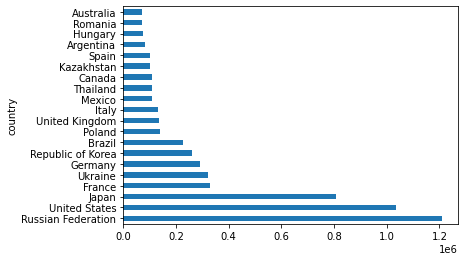

In [ ]:
# Melihat 20 negara dengan jumlah kasus dan tingkat bunuh diri tertinggi
suicide.groupby(['country']).suicides_no.sum().nlargest(20).plot(kind='barh')

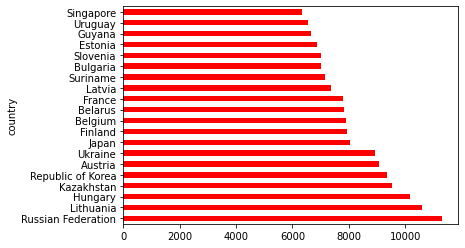

In [ ]:
# Melihat 20 negara dengan tingkat bunuh diri terbanyak
suicide.groupby(['country']).suicide_rate.sum().nlargest(20).plot(kind='barh', color='red')

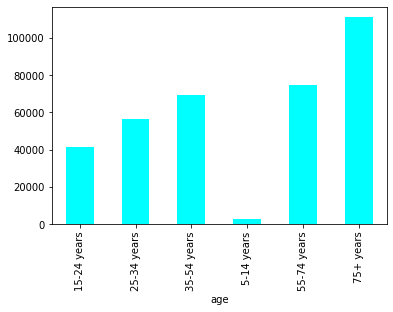

In [ ]:
# Tingkat bunuh diri berdasarkan kelompok umur
suicide.groupby(['age']).suicide_rate.sum().plot(kind='bar', color='cyan')

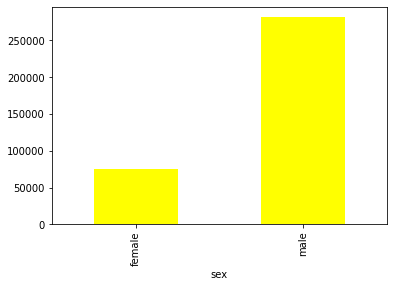

In [ ]:
# Tingkat bunuh diri berdasarkan jenis kelamin
suicide.groupby(['sex']).suicide_rate.sum().plot(kind='bar', color='yellow')

## Melihat hubungan variabel prediktor dengan variabel target

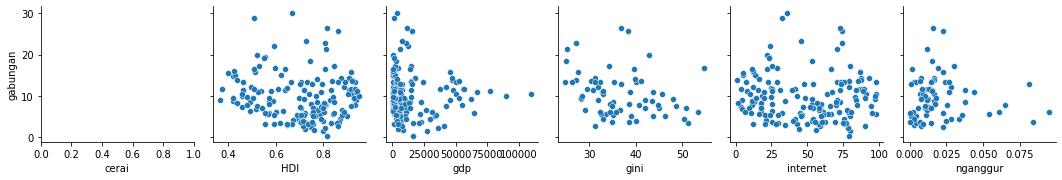

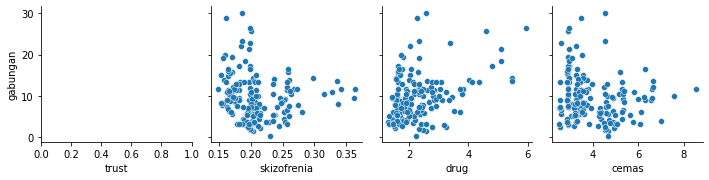

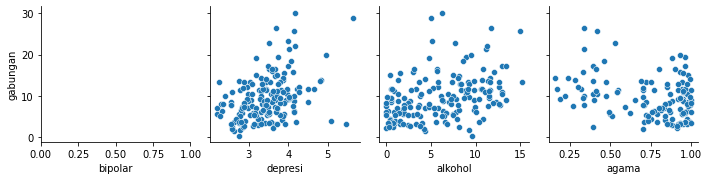

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

variables = list(data.columns)[:-1]
sns.pairplot(data, x_vars=variables[:6], y_vars=['gabungan'])
sns.pairplot(data, x_vars=variables[6:10], y_vars=['gabungan'])
sns.pairplot(data, x_vars=variables[10:14], y_vars=['gabungan'])
plt.show()

*Pair plot* antara variabel target dengan variabel **cerai** dan **drug** tidak muncul karena batas axis x.
Karenanya, berikut dibuat scatter plot secara manual untuk dua variabel prediktor tersebut.

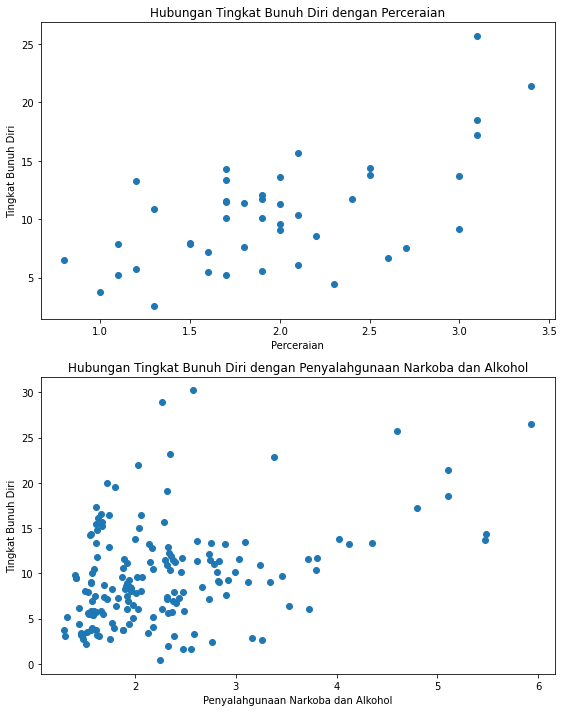

In [ ]:
# membuat scatter plot antara suicide rates gabungan dengan variabel cerai dan drug 
fig = plt.figure(figsize=(8,10))
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)

ax1.scatter(data['cerai'],data['gabungan'])
ax2.scatter(data['drug'],data['gabungan'])

# memberikan judul 
ax1.set_title("Hubungan Tingkat Bunuh Diri dengan Perceraian",fontdict={'fontsize': '12'})
ax2.set_title("Hubungan Tingkat Bunuh Diri dengan Penyalahgunaan Narkoba dan Alkohol",fontdict={'fontsize': '12'})

# menambahkan label sumbu x dan y
ax1.set_xlabel("Perceraian", fontdict={'fontsize': '10'})
ax2.set_xlabel("Penyalahgunaan Narkoba dan Alkohol", fontdict={'fontsize': '10'})

ax1.set_ylabel("Tingkat Bunuh Diri", fontdict={'fontsize': '10'})
ax2.set_ylabel("Tingkat Bunuh Diri", fontdict={'fontsize': '10'})

fig.tight_layout()
fig.show()

# Data Preparation

In [ ]:
# memeriksa multikolinearitas
abs(data.corr()) > 0.75

,cerai,HDI,gdp,gini,internet,nganggur,trust,skizofrenia,drug,cemas,bipolar,depresi,alkohol,agama,gabungan,pria,wanita
cerai,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
HDI,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
gdp,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
gini,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
internet,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
nganggur,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
trust,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
skizofrenia,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False
drug,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False
cemas,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False


In [ ]:
# memeriksa multikolinearitas data yang sudah diimputasi
abs(imputed_data.corr()) > 0.75

,cerai,HDI,gdp,gini,internet,nganggur,trust,skizofrenia,drug,cemas,bipolar,depresi,alkohol,agama,gabungan,pria,wanita
cerai,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
HDI,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
gdp,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
gini,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
internet,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
nganggur,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
trust,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
skizofrenia,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False
drug,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False
cemas,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False


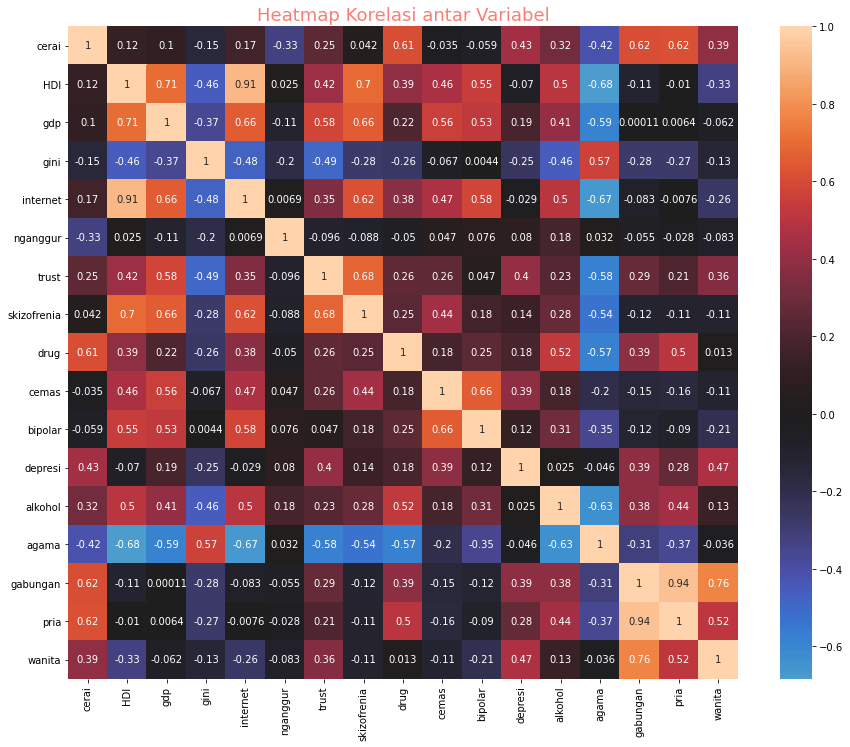

In [ ]:
plt.figure(figsize = (15,12))
plt.title("Heatmap Korelasi antar Variabel", fontsize = 18, color = "#F97E77")
sns.heatmap(data.corr(), center = 0, annot=True)

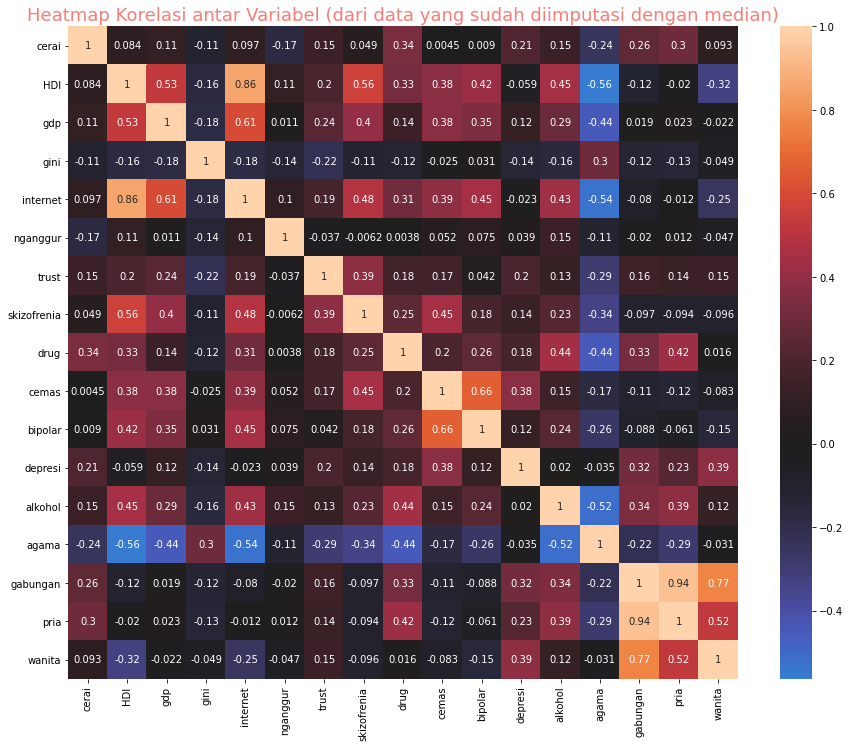

In [ ]:
plt.figure(figsize = (15,12))
plt.title("Heatmap Korelasi antar Variabel (dari data yang sudah diimputasi dengan median)", fontsize = 18, color = "#F97E77")
sns.heatmap(imputed_data.corr(), center = 0, annot=True)

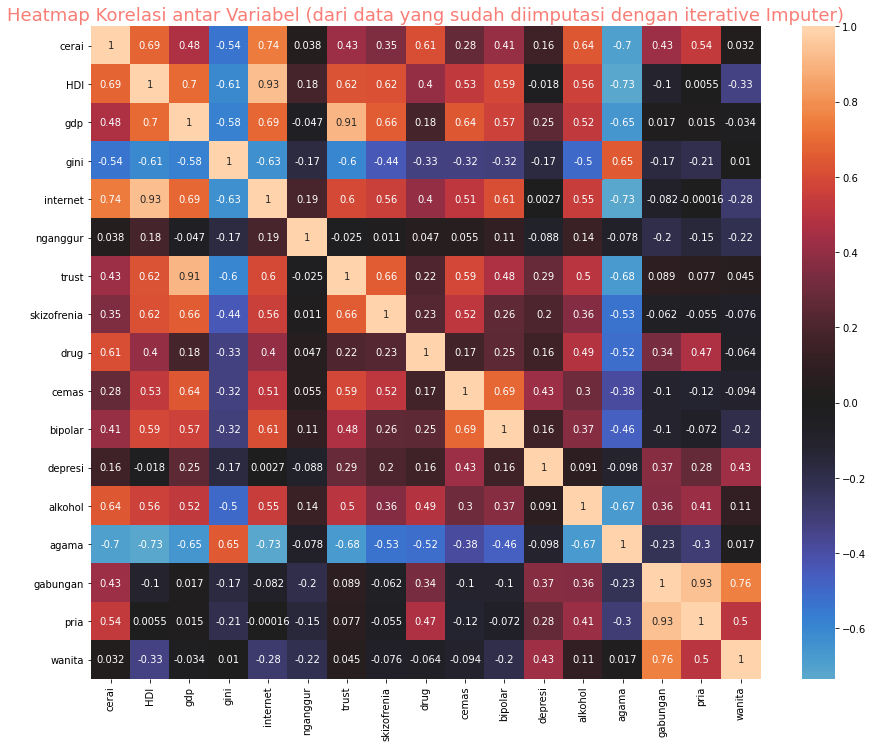

In [ ]:
plt.figure(figsize = (15,12))
plt.title("Heatmap Korelasi antar Variabel (dari data yang sudah diimputasi dengan iterative Imputer)", fontsize = 18, color = "#F97E77")
sns.heatmap(imputed_df.corr(), center = 0, annot=True)

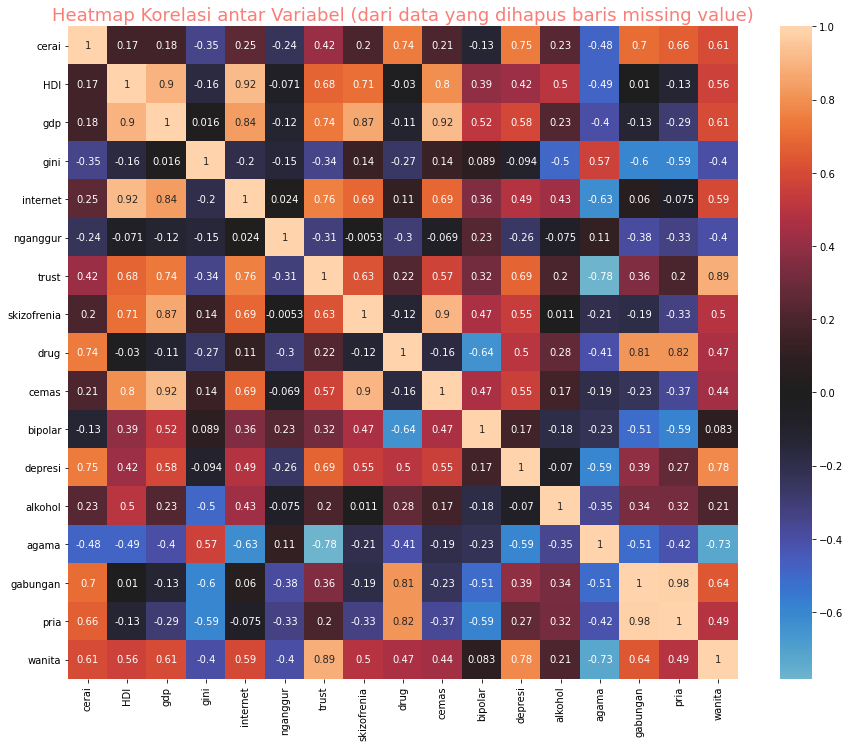

In [ ]:
plt.figure(figsize = (15,12))
plt.title("Heatmap Korelasi antar Variabel (dari data yang dihapus baris missing value)", fontsize = 18, color = "#F97E77")
sns.heatmap(data1.corr(), center = 0, annot=True)

karena data yang diimputasi dengan iterative imputer memiliki korelasi yang mirip dengan data yang dihilangkan missing valuenya maka diputuskan untuk menggunakan data yang sudah diimputasi dengan iterative imputer.

In [ ]:
# membuat data baru tanpa kolom Male dan Female Suicide Rate
# internet juga dibuang karena memiliki korelasi yang tinggi dengan variabel HDI
test=imputed_df.drop(columns=['pria', 'wanita', 'internet'])

In [ ]:
test.describe()

,cerai,HDI,gdp,gini,nganggur,trust,skizofrenia,drug,cemas,bipolar,depresi,alkohol,agama,gabungan
count,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000
mean,1.469114,0.703961,14263.689847,37.797780,0.017617,23.425697,0.215558,2.319667,4.028008,0.724912,3.474456,6.132400,0.742107,9.654584
std,0.483574,0.129699,19137.853602,4.518043,0.010238,14.219659,0.042022,0.781951,1.093926,0.156704,0.574831,3.608183,0.201049,4.175144
min,0.443073,0.365000,-14780.290200,20.479096,-0.003232,2.833330,0.148908,1.296910,2.059037,0.321949,2.194091,0.000000,-0.050003,0.400000
25%,1.174388,0.626500,2840.533140,36.058497,0.014134,14.852129,0.190794,1.783193,3.279242,0.627729,3.136297,3.512091,0.651881,7.900000
50%,1.439962,0.704938,8871.136233,38.317395,0.016957,19.964191,0.207119,2.217993,3.773818,0.710563,3.501981,6.007036,0.783903,9.688315
75%,1.692260,0.790234,18321.894926,40.188074,0.019050,27.495499,0.232585,2.577261,4.557065,0.805194,3.730790,8.430597,0.890000,10.582989
max,3.400000,1.075301,194000.000000,54.600000,0.094400,150.893188,0.467119,5.932823,10.144597,1.316681,6.272119,20.490065,1.043592,30.200000


In [ ]:
# scaling data agar nilainya menjadi antara 0 dan 1
# yang dilakukan scaling hanya variabel prediktor
#from sklearn.preprocessing import MinMaxScaler
#scaled_cols = ['cerai', 'gini', 'internet', 'trust', 'drug', 'cemas', 'bipolar', 'depresi', 'alkohol', 'agama']
#scaler = MinMaxScaler()
#scaler.fit(test[scaled_cols])
#test[scaled_cols] = scaler.transform(test[scaled_cols])

In [ ]:
# melakukan scaling untuk variabel prediktor
from sklearn.preprocessing import scale
test2=test.drop('gabungan', axis=1)
scaled=scale(test2)
scaled=pd.DataFrame(scaled, columns=[test2.columns])

scaled.head()

,cerai,HDI,gdp,gini,nganggur,trust,skizofrenia,drug,cemas,bipolar,depresi,alkohol,agama
0,-1.416954,-1.644704,-0.716672,0.879755,-0.257069,-0.657337,-1.180464,-0.653359,0.779110,-0.110110,1.152239,-1.646899,1.135418
1,0.892533,0.649041,-0.501608,-0.908497,0.835021,-0.452667,-0.350709,0.007521,-0.587049,-0.131529,-2.209461,0.379661,-1.206232
2,-0.973189,0.394180,-0.493757,0.420767,0.268823,-0.387228,-0.422432,-1.068028,0.947005,0.597046,0.302090,-1.452571,1.035773
3,-0.367644,-0.418131,-0.282172,0.236545,-0.049144,-0.243767,0.791852,-0.893150,-0.651878,-1.639795,-0.935182,-0.262003,0.301534
4,0.221767,0.467122,0.265172,-0.275862,0.203516,0.277199,-0.345136,-0.211845,0.219064,1.000518,-1.512069,0.140342,-0.336342


In [ ]:
from sklearn import preprocessing
import numpy as np

# normalize the data attributes
normalized = preprocessing.normalize(scaled)
normalized=pd.DataFrame(normalized, columns=[test2.columns])

normalized.head()

,cerai,HDI,gdp,gini,nganggur,trust,skizofrenia,drug,cemas,bipolar,depresi,alkohol,agama
0,-0.375134,-0.435430,-0.189737,0.232912,-0.068058,-0.174028,-0.312524,-0.172975,0.206267,-0.029151,0.305052,-0.436011,0.300598
1,0.279973,0.203594,-0.157346,-0.284981,0.261933,-0.141994,-0.110012,0.002359,-0.184148,-0.041258,-0.693072,0.119093,-0.378376
2,-0.353199,0.143060,-0.179199,0.152709,0.097564,-0.140537,-0.153313,-0.387619,0.343696,0.216685,0.109637,-0.527181,0.375913
3,-0.149097,-0.169572,-0.114434,0.095930,-0.019930,-0.098859,0.321134,-0.362216,-0.264368,-0.665016,-0.379261,-0.106255,0.122287
4,0.108674,0.228908,0.129945,-0.135184,0.099731,0.135838,-0.169130,-0.103812,0.107350,0.490294,-0.740974,0.068773,-0.164821


In [ ]:
normal=normalized.join(test['gabungan'], how='outer')
normal.columns=test.columns
normal.head()

,cerai,HDI,gdp,gini,nganggur,trust,skizofrenia,drug,cemas,bipolar,depresi,alkohol,agama,gabungan
0,-0.375134,-0.435430,-0.189737,0.232912,-0.068058,-0.174028,-0.312524,-0.172975,0.206267,-0.029151,0.305052,-0.436011,0.300598,6.400000
1,0.279973,0.203594,-0.157346,-0.284981,0.261933,-0.141994,-0.110012,0.002359,-0.184148,-0.041258,-0.693072,0.119093,-0.378376,5.600000
2,-0.353199,0.143060,-0.179199,0.152709,0.097564,-0.140537,-0.153313,-0.387619,0.343696,0.216685,0.109637,-0.527181,0.375913,3.300000
3,-0.149097,-0.169572,-0.114434,0.095930,-0.019930,-0.098859,0.321134,-0.362216,-0.264368,-0.665016,-0.379261,-0.106255,0.122287,9.451181
4,0.108674,0.228908,0.129945,-0.135184,0.099731,0.135838,-0.169130,-0.103812,0.107350,0.490294,-0.740974,0.068773,-0.164821,8.095783


In [ ]:
# memisahkan variabel prediktor dengan variabel target
X=test.drop('gabungan', axis=1)
X.head()

,cerai,HDI,gdp,gini,nganggur,trust,skizofrenia,drug,cemas,bipolar,depresi,alkohol,agama
0,0.785055,0.491000,571.000000,41.765920,0.014990,14.094181,0.166035,1.809625,4.878875,0.707686,4.135694,0.200000,0.970000
1,1.900000,0.788000,4680.000000,33.700000,0.026151,16.999668,0.200845,2.325538,3.386891,0.704335,2.206507,7.500000,0.500000
2,0.999290,0.755000,4830.000000,39.695651,0.020365,17.928630,0.197836,1.485915,5.062233,0.818315,3.647817,0.900000,0.950000
3,1.291627,0.649820,8872.531643,38.864715,0.017115,19.965195,0.248777,1.622432,3.316091,0.468379,2.937781,5.188621,0.802629
4,1.576176,0.764445,19330.048308,36.553501,0.019697,27.360795,0.201079,2.154291,4.267248,0.881435,2.606721,6.637934,0.674598


In [ ]:
# membuat data frame baru untuk variabel target
y=pd.DataFrame(test['gabungan'])
y.head()

,gabungan
0,6.400000
1,5.600000
2,3.300000
3,9.451181
4,8.095783


In [ ]:
# memisahkan data train dan test
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=777)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(240, 13) (60, 13) (240, 1) (60, 1)


# Membangun Model

## Regresi Lasso

In [ ]:
#membangun fungsi regresi lasso dengan linear_model
from sklearn.linear_model import Lasso

la=Lasso(alpha=0.5, max_iter=200000000) #menspesifikasikan hyperparameter model
la.fit(X_train, y_train)

#menampilkan koefisien dan konstanta regresi
coef = la.coef_
print ("a = ")
for p,c in zip(X, coef):
    print(p + '\t' + str(c))

intercept = la.intercept_
print("b = ",intercept)

a = 
cerai	0.05913414073051416
HDI	-0.0
gdp	-9.723544239415194e-05
gini	-0.017319438049780818
nganggur	-0.0
trust	0.06881573159188345
skizofrenia	-0.0
drug	0.0
cemas	-0.3175350854898219
bipolar	-0.0
depresi	1.5502746233645548
alkohol	0.512223620638829
agama	-0.0
b =  [2.67856141]


## Decision Tree Regressor

In [ ]:
# memasukan model regression tree
from sklearn.tree import DecisionTreeRegressor
# memasukan library untuk menggambar decision tree
from sklearn import tree
from dtreeviz.trees import *
from IPython.display import Image, display_svg, SVG

# membangun model decision tree
# kriteria boundary yang digunakan adalah mse
dt=DecisionTreeRegressor(criterion='mse', max_features='sqrt', max_depth=3, random_state=5)
dt.fit(X_train, y_train)
#tree.plot_tree(dt, max_depth=4)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=3,
                      max_features='sqrt', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=5, splitter='best')

In [ ]:
viz=dtreeviz(dt,
               X_train.values,
               y_train.values,
               target_name='Tingkat Bunuh Diri',  # this name will be displayed at the leaf node
               feature_names=X_train.columns
              )

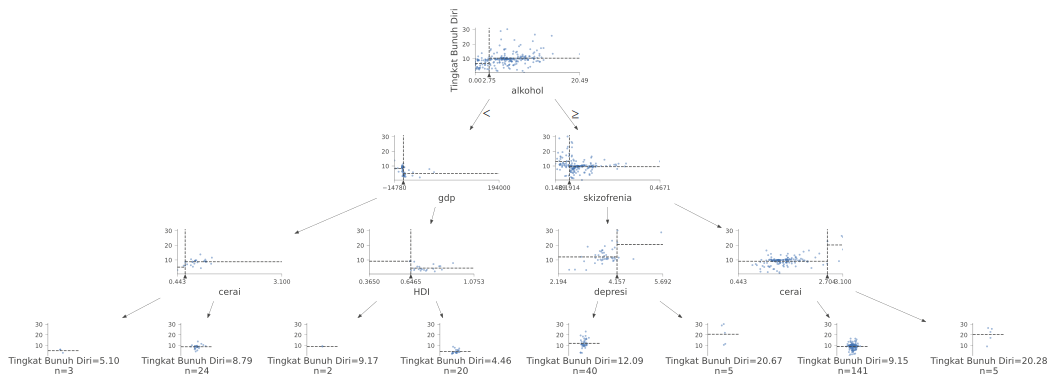

In [ ]:
viz

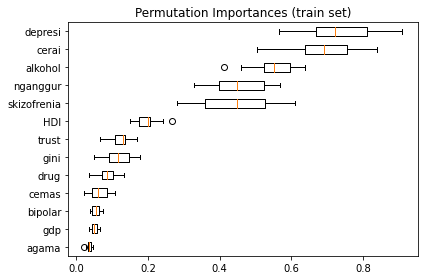

In [ ]:
from sklearn.inspection import permutation_importance

dt=DecisionTreeRegressor(criterion='mse', random_state=15)
dt.fit(X_train, y_train)

result=permutation_importance(dt, X_train, y_train, n_repeats=20,
                                random_state=15, n_jobs=-1)

sorted_idx=result.importances_mean.argsort()

fig, ax=plt.subplots()
ax.boxplot(result.importances[sorted_idx].T,
           vert=False, labels=X_train.columns[sorted_idx])
ax.set_title("Permutation Importances (train set)")
fig.tight_layout()
plt.show()

## Regresi Linear (modul scikitlearn)

In [ ]:
# model dengan regresi linear dari modul scikitlearn
from sklearn.linear_model import LinearRegression

lr=LinearRegression(normalize=True)
lr.fit(X_train,y_train)

r_sq=lr.score(X_train, y_train)
print('coefficient of determination:', r_sq)
print('intercept:', lr.intercept_)
print('slope:', lr.coef_)

coefficient of determination: 0.6319378696606487
intercept: [14.2609509]
slope: [[ 5.34787955e+00 -1.99693207e+01 -4.10821086e-05 -4.74185753e-02
  -5.31526338e+01  4.89583593e-02 -4.11053180e+00  1.32064487e-01
  -4.81653402e-01 -2.21927385e+00  2.32641766e+00  3.29787314e-01
  -2.94876996e+00]]


In [ ]:
koef_lr=pd.DataFrame(lr.coef_)
koef_lr.columns=X_train.columns
koef_lr

,cerai,HDI,gdp,gini,nganggur,trust,skizofrenia,drug,cemas,bipolar,depresi,alkohol,agama
0,5.34788,-19.969321,-0.000041,-0.047419,-53.152634,0.048958,-4.110532,0.132064,-0.481653,-2.219274,2.326418,0.329787,-2.94877


In [ ]:
transposed=koef_lr.transpose()
transposed

,0
cerai,5.347880
HDI,-19.969321
gdp,-0.000041
gini,-0.047419
nganggur,-53.152634
trust,0.048958
skizofrenia,-4.110532
drug,0.132064
cemas,-0.481653
bipolar,-2.219274


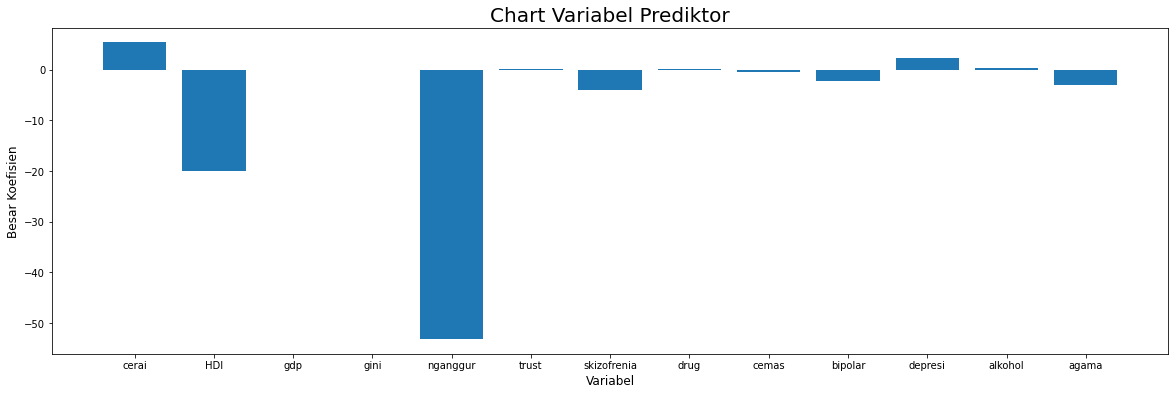

In [ ]:
fig = plt.figure(figsize=(20,6))
ax1 = fig.add_subplot(111)

ax1.bar(x=koef_lr.columns, height=transposed[0])

ax1.set_title("Chart Variabel Prediktor", fontdict={'fontsize':'20'})
ax1.set_xlabel("Variabel", fontdict={'fontsize':'12'})
ax1.set_ylabel("Besar Koefisien", fontdict={'fontsize':'12'})
fig.show()

## Regresi Linear (modul statsmodels)

In [ ]:
# model regresi linear dengan metode ordinary least square dari modul statsmodels
from statsmodels.api import OLS

ols=OLS(y_train,X_train).fit()
ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:               gabungan   R-squared (uncentered):                   0.935
Model:                            OLS   Adj. R-squared (uncentered):              0.931
Method:                 Least Squares   F-statistic:                              250.9
Date:                Sun, 13 Dec 2020   Prob (F-statistic):                   1.15e-126
Time:                        06:30:08   Log-Likelihood:                         -578.36
No. Observations:                 240   AIC:                                      1183.
Df Residuals:                     227   BIC:                                      1228.
Df Model:                          13                                                  
Covariance Type:            nonrobust                                                  
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
cerai           5.4205      0.688      7.879      0.000       4.065       6.776
HDI           -14.9176      2.783     -5.360      0.000     -20.402      -9.433
gdp         -5.798e-05   2.75e-05     -2.111      0.036      -0.000   -3.86e-06
gini            0.0713      0.046      1.551      0.122      -0.019       0.162
nganggur      -49.8239     18.862     -2.641      0.009     -86.992     -12.656
trust           0.0776      0.033      2.339      0.020       0.012       0.143
skizofrenia     0.2723      6.814      0.040      0.968     -13.155      13.700
drug            0.3336      0.342      0.975      0.331      -0.341       1.008
cemas          -0.7358      0.296     -2.486      0.014      -1.319      -0.153
bipolar        -1.2566      1.973     -0.637      0.525      -5.145       2.632
depresi         2.9194      0.394      7.402      0.000       2.142       3.697
alkohol         0.3686      0.073      5.047      0.000       0.225       0.512
agama           0.0481      1.585      0.030      0.976      -3.076       3.172
==============================================================================
Omnibus:                       39.541   Durbin-Watson:                   1.957
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              107.148
Skew:                           0.714   Prob(JB):                     5.41e-24
Kurtosis:                       5.945   Cond. No.                     2.45e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.45e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Support Vector Regression

In [ ]:
# model dengan linear support vector regression
from sklearn.svm import LinearSVR

svr=LinearSVR(C=0.5, dual=True, epsilon=0.01, tol=0.001)
svr.fit(X_train, y_train)

# hyperparameter didapat dari tpot regression

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVR(C=0.5, dual=True, epsilon=0.01, fit_intercept=True,
          intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=1000,
          random_state=None, tol=0.001, verbose=0)

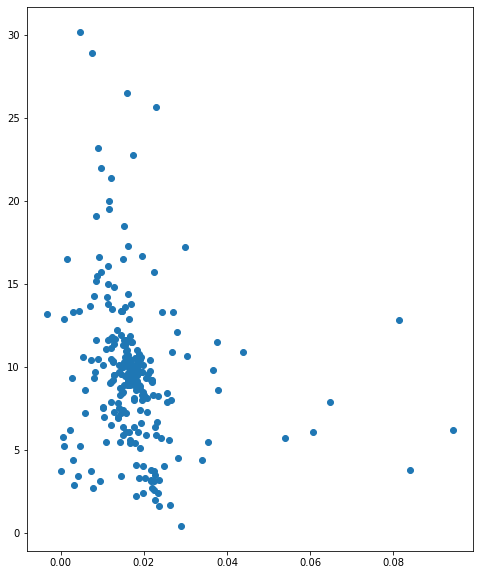

In [ ]:
fig = plt.figure(figsize=(8,10))
ax1 = fig.add_subplot(111)

ax1.scatter(imputed_df['nganggur'],imputed_df['gabungan'])

fig.show()

# Evaluasi Model

In [ ]:
# memprediksi nilai test set dengan model yang telah dibuat
y_pred_la=la.predict(X_test)
y_pred_dt=dt.predict(X_test)
y_pred_lr=lr.predict(X_test)
y_pred_ols=ols.predict(X_test)
y_pred_svr=svr.predict(X_test)

In [ ]:
# Evaluasi model menggunakan Root Mean Squared Error
from sklearn.metrics import mean_squared_error

print("RMSE Regresi Lasso: ", np.sqrt(mean_squared_error(y_pred_la, y_test)))
print("RMSE Regression Tree: ", np.sqrt(mean_squared_error(y_pred_dt, y_test)))
print("RMSE Regresi Linear: ", np.sqrt(mean_squared_error(y_pred_lr, y_test)))
print("RMSE Regresi Linear (statsmodel): ", np.sqrt(mean_squared_error(y_pred_ols, y_test)))
print("RMSE Support Vector Regression ", np.sqrt(mean_squared_error(y_pred_svr, y_test)))

RMSE Regresi Lasso:  2.6586951639802128
RMSE Regression Tree:  4.469742102656562
RMSE Regresi Linear:  2.187316580996957
RMSE Regresi Linear (statsmodel):  2.408010772136541
RMSE Support Vector Regression  4.43630732715544


In [ ]:
# Evaluasi model menggunakan nilai R squared
from sklearn.metrics import r2_score
print("R squared Regresi Lasso: ", r2_score(y_pred_la, y_test))
print("R squared Regression Tree: ", r2_score(y_pred_dt, y_test))
print("R squared Regresi Linear: ", r2_score(y_pred_lr, y_test))
print("R squared Regresi Linear (statsmodels): ", r2_score(y_pred_ols, y_test))
print("R squared Support Vector Regression: ", r2_score(y_pred_svr, y_test))

R squared Regresi Lasso:  -0.8456745786425759
R squared Regression Tree:  0.25419894645041685
R squared Regresi Linear:  0.6365409799430068
R squared Regresi Linear (statsmodels):  0.5892329947696928
R squared Support Vector Regression:  -0.8788740041663612


In [ ]:
from sklearn.metrics import explained_variance_score
print("Variance score Regresi Lasso: ", explained_variance_score(y_pred_la, y_test))
print("variance score Regression Tree: ", explained_variance_score(y_pred_dt, y_test))
print("variance score Regresi Linear: ", explained_variance_score(y_pred_lr, y_test))
print("variance score Regresi Linear (statsmodels): ", explained_variance_score(y_pred_ols, y_test))
print("variance score Support Vector Regression: ", explained_variance_score(y_pred_svr, y_test))

Variance score Regresi Lasso:  -0.813527630174218
variance score Regression Tree:  0.26753107996518644
variance score Regresi Linear:  0.6378371784672158
variance score Regresi Linear (statsmodels):  0.59123426184912
variance score Support Vector Regression:  -0.8276359710263042
